In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader


In [2]:
# TODO
# Include a method for loading and unzipping dataset automatically

In [3]:
# Loading the dataset
df = pd.read_csv('Archive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

> We have about 78 columns and 225745 rows  in the dataset which most of them are numbers (Hence and already engineered)

In [5]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [6]:
# Checking the null values
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

> Flow Bytes/s Column has 4 missing values so we are going to check if they are missing by random or ?

In [7]:
# Checking for unique/distinct values
df.nunique()

 Destination Port               23950
 Flow Duration                 187752
 Total Fwd Packets                297
 Total Backward Packets           367
Total Length of Fwd Packets      3831
                                ...  
Idle Mean                       35285
 Idle Std                        5857
 Idle Max                       33002
 Idle Min                       48018
 Label                              2
Length: 79, dtype: int64

> From this output we can note that most of the fields are unique also some fields have only 1 number of unique features

It's highly possible the features with only one unique value will not be an influence to the final model prediction

In [8]:
# Checking for non numerical columns
df.select_dtypes(exclude=['int', 'float64']).columns

Index([' Label'], dtype='object')

Label as the non-numerical column ? Let's check it out and confirm

In [9]:
# Loading the first row
df.head(1)[' Label']  # Also note the column has space in between we have to rename the column

0    BENIGN
Name:  Label, dtype: object

In [10]:
# Renaming the column to remove space
df['Label'] = df[' Label']
df.drop([' Label'], axis=1, inplace=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
# Encoding the label column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

In [12]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [13]:
# Check for null value and fill it or drop it
df.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Label                          0
Length: 79, dtype: int64

In [14]:
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(), inplace=True)

/var/folders/j0/tr2332417vjbmj74tfc0dcd40000gn/T/ipykernel_2986/2963809573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(), inplace=True)


In [15]:
df.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Label                          0
Length: 79, dtype: int64

In [16]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())

In [17]:
sorted(df.max())

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 7.0,
 52.0,
 337.0,
 1460.0,
 1472.0,
 1931.0,
 1932.0,
 1932.0,
 1936.833333,
 2528.0,
 2942.0,
 2942.0,
 3867.0,
 3867.0,
 4731.522394,
 5800.5,
 5800.5,
 6692.644993,
 8194.660487,
 11680.0,
 11680.0,
 11680.0,
 39396.0,
 39396.0,
 58852.0,
 65532.0,
 65535.0,
 65535.0,
 183012.0,
 183012.0,
 2000000.0,
 3000000.0,
 3000000.0,
 5172346.0,
 5172346.0,
 22400000.0,
 39500000.0,
 65300000.0,
 69200000.0,
 76700000.0,
 76700000.0,
 100000000.0,
 100000000.0,
 100000000.0,
 107000000.0,
 107000000.0,
 119999937.0,
 120000000.0,
 120000000.0,
 120000000.0,
 120000000.0,
 120000000.0,
 120000000.0,
 120000000.0,
 120000000.0,
 120000000.0,
 120000000.0,
 120000000.0,
 120000000.0,
 2070000000.0]

In [48]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

len(X_train), len(X_test), len(y_train), len(y_test)

(180596, 45149, 180596, 45149)

In [49]:
# Model Prediction
from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
end_time = time.time()

In [50]:
from sklearn.metrics import accuracy_score
preds = rfc.predict(X_test)
print(f'The accuracy of the model is {round(accuracy_score(y_test, preds))} With training time of {round(end_time - start_time, 2)} seconds')

The accuracy of the model is 1 With training time of 13.39 seconds


` That is pretty nice in one shot for 99 percent. But we can include checks to determine
 what are the important features and which features contribute to the best performance of the model`

In [21]:
# Testing with other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


tree = DecisionTreeClassifier()
logreg = LogisticRegression()

for model in [logreg, tree]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(model.__class__.__name__, accuracy_score(y_test, preds))

LogisticRegression 0.998538173602959
DecisionTreeClassifier 0.9998006600367672


In [58]:
# Training with deep learning model
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(X_train.shape[1], 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

batch_size = 32
epochs = 10
dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        output = model(batch_X).squeeze()
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        preds = model(torch.from_numpy(X_test).float()).numpy()
        preds = preds.squeeze()
        preds = (preds > 0.5).astype(int)
        accuracy = (preds == y_test).float().mean()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

ModuleNotFoundError: No module named 'torch._C._dynamo.guards'; 'torch._C._dynamo' is not a package

## FEATURE IMPORTANCE

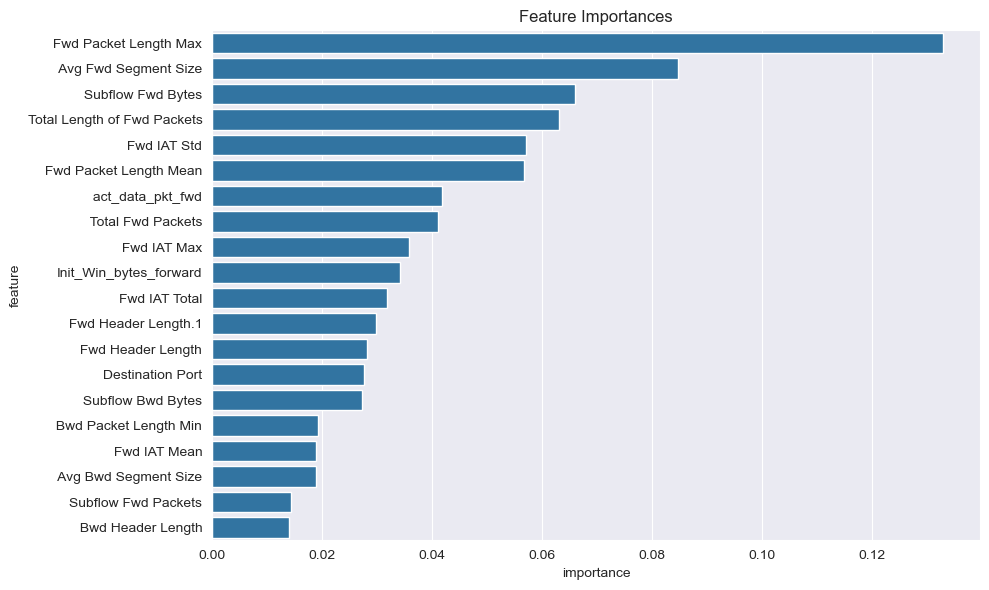

In [22]:
# Get the important features for the model
importances = rfc.feature_importances_
feat_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
# We are only going to use 20 important features
feat_importances = feat_importances.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feat_importances)
plt.title('Feature Importances')
plt.tight_layout()

In [47]:
# training on the top 20 columns
import time

top_20_columns = feat_importances.feature
# Select the 20 columns
df_20_columns = df[top_20_columns]

X_20 = df_20_columns # The 20 Columns don't have label
y_20 = df['Label'] # We include the label column from the original pandas df

# Scaling
scaler = StandardScaler()
X_20 = scaler.fit_transform(X_20)
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_20, y_20, test_size=0.2, random_state=42)

# Training the model
print(f'-------- Training the model for {len(X_train)} samples and testing for {len(X_test)} samples --------')
start_time = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
end_time = time.time()
preds = rfc.predict(X_test)
print(f'The accuracy of the model is {round(accuracy_score(y_test, preds))} With training time of {round(end_time - start_time, 2)} seconds')

-------- Training the model for 180596 samples and testing for 45149 samples --------
The accuracy of the model is 1 With training time of 6.21 seconds


The same performance as the model trained with 78 columns. so the model performs the same within 6.21 seconds Compared to the model with 78 columns which takes training time of 13.39 seconds.
So we reduced the training time by half, which is some improvements

<Axes: >

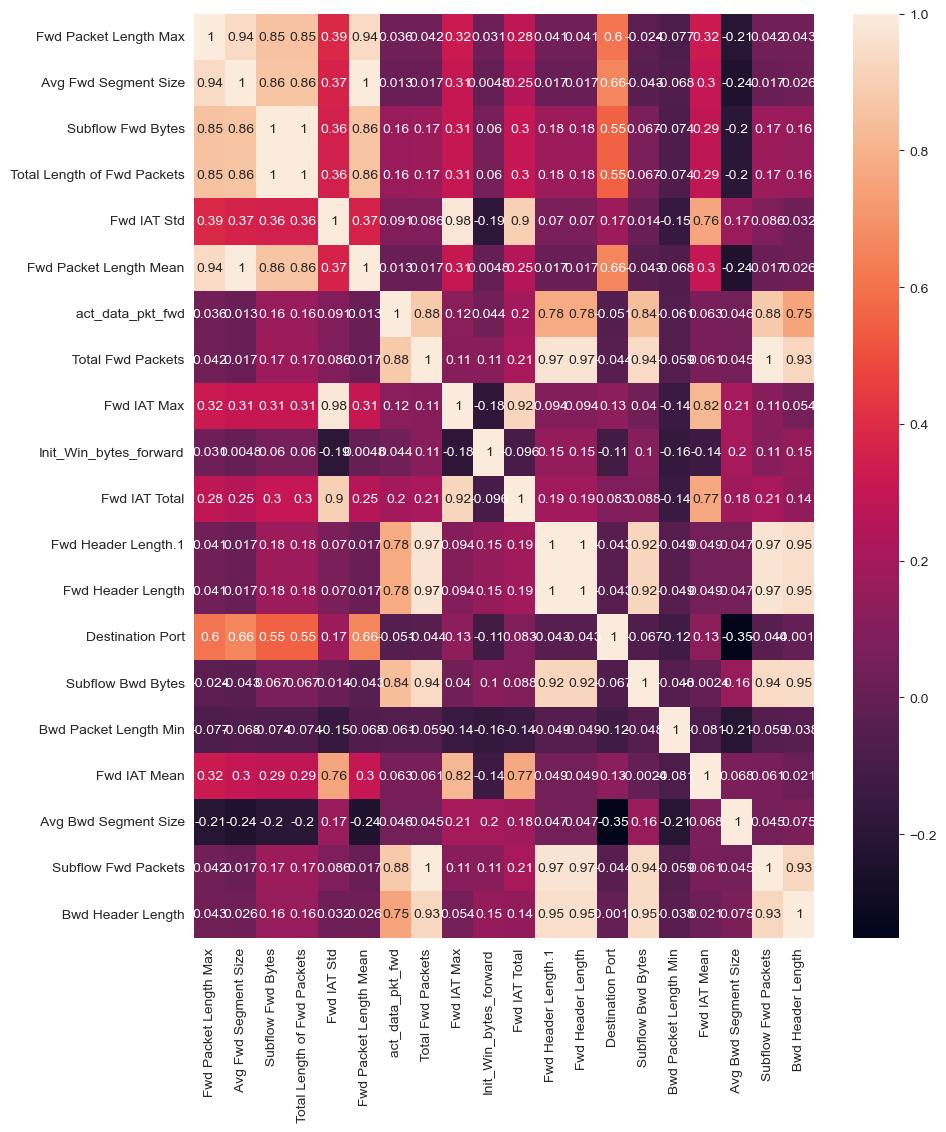

In [52]:
# Correlation between the top 20 columns
corr = df_20_columns.corr()
plt.figure(figsize=(10, 12))
sns.heatmap(corr, annot=True)